# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [1]:
import pandas as pd

In [2]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Run the code below to see how this works.

In [3]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
sample_df["column 1"].loc[sample_df["column 2"] == 0]

0    20
4    65
5    50
Name: column 1, dtype: int64

Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [4]:
sample_df["column 1"].loc[sample_df["column 2"] == 1]

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [5]:
sample_df["column 2"].loc[sample_df["column 1"] == 50]

1    1
3    1
5    0
Name: column 2, dtype: int64

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [6]:
import numpy as np

In [17]:
# You can use this function in your code to find the log of distance
df = pd.read_csv("oh_table.csv")
#np.log10()
g = df["G"]
dist = df["distance"]
AbsMag = g - 5 * np.log10(dist) + 5

In [21]:
df = pd.read_csv("oh_table.csv")
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
%matplotlib inline 

In [26]:
g = df["G"].loc[df["group_id"] == 8]

In [28]:
dist = df["distance"].loc[df["group_id"] == 8]

In [30]:
j = df["J"].loc[df["group_id"] == 8]

In [31]:
AbsMag = g - 5 * np.log10(dist) + 5

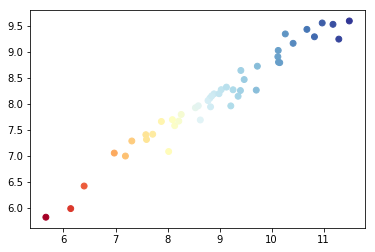

In [52]:
cm = plt.cm.get_cmap("RdYlBu")
plt.scatter(g, j, c=g, s=35, cmap=cm, norm=mpl.LogNorm())



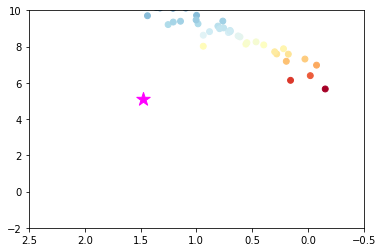

In [51]:
cm = plt.cm.get_cmap("RdYlBu")# This is the colormap we'll use for our data points. Note: _r reverses the colormap
plt.scatter(g - j, g, c=g, s=35, cmap=cm, norm=mpl.LogNorm())
plt.scatter(5.12 - 3.64, 5.12, c='magenta', s=200, marker='*')
plt.ylim([-2, 10])
plt.xlim(-0.5, 2.5)
plt.gca().invert_xaxis()


### Coding Challenge 1: Add the sun to your color magnitude diagram

### Coding Challenge 2: Add a colormap to your diagram

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster